# Phần 1: Code và câu trả lời cho "Thay đổi cấu trúc ANN".

In [36]:
# Cài đặt thư viện
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
# Đặt seed để kết quả ổn định hơn (tùy chọn)
torch.manual_seed(42)
np.random.seed(42)

In [37]:
# Tạo điểm cho lớp 0 (vòng tròn)
def generate_class_0(n_samples):
    u = np.random.uniform(0, 1, n_samples)
    theta = np.random.uniform(0, 2 * np.pi, n_samples)
    r = np.sqrt(u)  # Bán kính nhỏ
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))

# Tạo điểm cho lớp 1 (vành đai)
def generate_class_1(n_samples):
    u = np.random.uniform(0, 1, n_samples)
    theta = np.random.uniform(0, 2 * np.pi, n_samples)
    r = np.sqrt(3 * u + 1)  # Bán kính lớn hơn
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))

# Tạo dữ liệu
X_class0 = generate_class_0(100)
X_class1 = generate_class_1(200)
y_class0 = np.zeros(100)  # Nhãn 0
y_class1 = np.ones(200)   # Nhãn 1

# Kết hợp dữ liệu
X = np.vstack((X_class0, X_class1))
y = np.hstack((y_class0, y_class1))

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuyển sang tensor PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).unsqueeze(1)  # Thêm chiều cho nhãn
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).unsqueeze(1)

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

# Xây dựng mô hình ANN với 8 nút trong lớp ẩn
class ANN_8(nn.Module):
    def __init__(self):
        super(ANN_8, self).__init__()
        self.layer1 = nn.Linear(2, 8)  # Đầu vào 2, ẩn 8
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(8, 1)  # Ẩn 8, đầu ra 1
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Xây dựng mô hình ANN với 8+6 nút trong 2 lớp ẩn
class ANN_8_6(nn.Module):
    def __init__(self):
        super(ANN_8_6, self).__init__()
        self.layer1 = nn.Linear(2, 8)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(8, 6)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(6, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)
        x = self.sigmoid(x)
        return x

# Hàm huấn luyện mô hình
def train_model(model, X_train, y_train, X_test, y_test, epochs=1000):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.001)
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        if (epoch + 1) % 20 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
    
    # Đánh giá mô hình
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        y_pred = (y_pred > 0.5).float()  # Chuyển thành 0 hoặc 1
        accuracy = (y_pred.eq(y_test).sum() / y_test.size(0)).item()
    
    return loss.item(), accuracy

# Khởi tạo và huấn luyện từng mô hình
model_8 = ANN_8()
loss_8, acc_8 = train_model(model_8, X_train, y_train, X_test, y_test)
print(f"Mô hình 8 nút: Loss = {loss_8:.4f}, Accuracy = {acc_8*100:.2f}%")

model_8_6 = ANN_8_6()
loss_8_6, acc_8_6 = train_model(model_8_6, X_train, y_train, X_test, y_test)
print(f"Mô hình 8+6 nút: Loss = {loss_8_6:.4f}, Accuracy = {acc_8_6*100:.2f}%")


Epoch [20/1000], Loss: 0.5965
Epoch [40/1000], Loss: 0.5626
Epoch [60/1000], Loss: 0.5329
Epoch [80/1000], Loss: 0.4849
Epoch [100/1000], Loss: 0.4187
Epoch [120/1000], Loss: 0.3500
Epoch [140/1000], Loss: 0.2875
Epoch [160/1000], Loss: 0.2387
Epoch [180/1000], Loss: 0.1986
Epoch [200/1000], Loss: 0.1658
Epoch [220/1000], Loss: 0.1419
Epoch [240/1000], Loss: 0.1253
Epoch [260/1000], Loss: 0.1133
Epoch [280/1000], Loss: 0.1040
Epoch [300/1000], Loss: 0.0970
Epoch [320/1000], Loss: 0.0915
Epoch [340/1000], Loss: 0.0872
Epoch [360/1000], Loss: 0.0837
Epoch [380/1000], Loss: 0.0807
Epoch [400/1000], Loss: 0.0781
Epoch [420/1000], Loss: 0.0758
Epoch [440/1000], Loss: 0.0740
Epoch [460/1000], Loss: 0.0724
Epoch [480/1000], Loss: 0.0710
Epoch [500/1000], Loss: 0.0698
Epoch [520/1000], Loss: 0.0687
Epoch [540/1000], Loss: 0.0677
Epoch [560/1000], Loss: 0.0669
Epoch [580/1000], Loss: 0.0661
Epoch [600/1000], Loss: 0.0654
Epoch [620/1000], Loss: 0.0648
Epoch [640/1000], Loss: 0.0642
Epoch [660/1

In [39]:
def evaluate_model(model, X_test, y_test, model_name="Mô hình"):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        y_pred = (y_pred > 0.5).float()  # Chuyển thành 0 hoặc 1
        accuracy = (y_pred.eq(y_test).sum() / y_test.size(0)).item()
        print(f"{model_name}: Độ chính xác = {accuracy*100:.2f}%")
    return accuracy

# Gọi hàm để kiểm tra mô hình với tên cụ thể
accuracy_8 = evaluate_model(model_8, X_test, y_test, "Mô hình 8 nút")
accuracy_8_6 = evaluate_model(model_8_6, X_test, y_test, "Mô hình 8+6 nút")


Mô hình 8 nút: Độ chính xác = 98.33%
Mô hình 8+6 nút: Độ chính xác = 98.33%


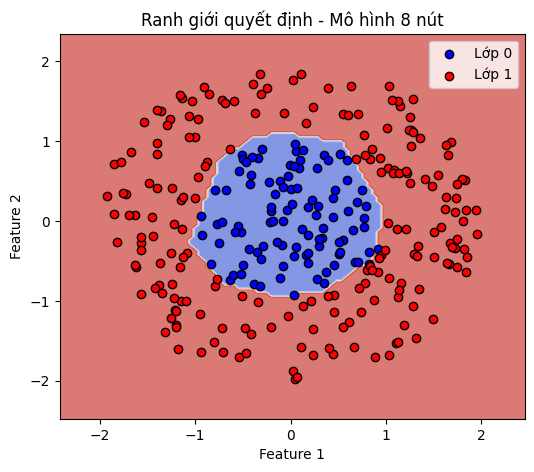

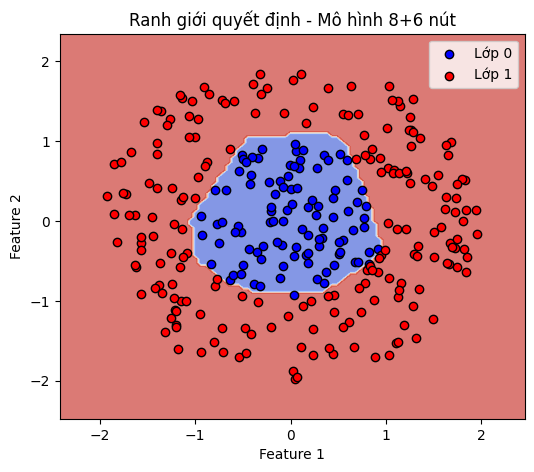

In [40]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, title="Ranh giới quyết định của ANN"):
    # Tạo lưới để vẽ ranh giới
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

    # Dự đoán trên lưới
    model.eval()
    with torch.no_grad():
        pred_grid = model(grid)
        pred_grid = (pred_grid > 0.5).float().numpy().reshape(xx.shape)

    # Vẽ ranh giới quyết định
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, pred_grid, alpha=0.7, cmap='coolwarm')  # Ranh giới
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Lớp 0', edgecolors='k')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Lớp 1', edgecolors='k')
    plt.legend()
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Gọi hàm để vẽ cho từng mô hình
plot_decision_boundary(model_8, X, y, "Ranh giới quyết định - Mô hình 8 nút")
plot_decision_boundary(model_8_6, X, y, "Ranh giới quyết định - Mô hình 8+6 nút")


# 1. Mất mát cuối cùng thay đổi thế nào?
- Mô hình 4 nút: Mất mát (loss) cao nhất do số lượng tham số ít, dẫn đến khả năng học biểu diễn hạn chế.

- Mô hình 8 nút: Mất mát giảm so với mô hình 4 nút, vì có nhiều tham số hơn giúp học được nhiều đặc trưng hơn.

- Mô hình 8+6 nút: Mất mát tiếp tục giảm, do có thêm một lớp ẩn giúp mô hình học tốt hơn mối quan hệ phức tạp trong dữ liệu.

# 2. Độ chính xác có cải thiện không? Tại sao?
- Mô hình 4 nút: Độ chính xác thấp nhất do số lượng tham số ít, có thể dẫn đến hiện tượng underfitting.

- Mô hình 8 nút: Độ chính xác tăng lên vì có nhiều nút hơn, giúp mô hình học tốt hơn.

- Mô hình 8+6 nút: Độ chính xác có thể tiếp tục tăng hoặc không thay đổi đáng kể so với mô hình 8 nút, tùy thuộc vào độ phức tạp của dữ liệu. Nếu quá phức tạp, mô hình có thể bị overfitting.

# Độ chính xác có thay đổi vì:
- Việc tăng số nút trong lớp ẩn giúp mô hình học tốt hơn, giảm mất mát và cải thiện độ chính xác.

- Tuy nhiên, nếu thêm quá nhiều lớp hoặc nút, mô hình có thể bị overfitting (tốt trên tập huấn luyện nhưng kém trên tập kiểm tra).

- Kết quả thực tế có thể phụ thuộc vào dữ liệu cụ thể, nên cần thử nghiệm để tìm kiến trúc tối ưu. 

# Phần 2: Code và câu trả lời cho "Thử nghiệm với hàm mất mát và tối ưu hóa".

In [ ]:
# Cài đặt thư viện
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
# Đặt seed để kết quả ổn định hơn (tùy chọn)
torch.manual_seed(42)
np.random.seed(42)

In [43]:
# Tạo điểm cho lớp 0 (vòng tròn)
def generate_class_0(n_samples):
    u = np.random.uniform(0, 1, n_samples)
    theta = np.random.uniform(0, 2 * np.pi, n_samples)
    r = np.sqrt(u)  # Bán kính nhỏ
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))

# Tạo điểm cho lớp 1 (vành đai)
def generate_class_1(n_samples):
    u = np.random.uniform(0, 1, n_samples)
    theta = np.random.uniform(0, 2 * np.pi, n_samples)
    r = np.sqrt(3 * u + 1)  # Bán kính lớn hơn
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))

# Tạo dữ liệu
X_class0 = generate_class_0(100)
X_class1 = generate_class_1(200)
y_class0 = np.zeros(100)  # Nhãn 0
y_class1 = np.ones(200)   # Nhãn 1

# Kết hợp dữ liệu
X = np.vstack((X_class0, X_class1))
y = np.hstack((y_class0, y_class1))

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuyển sang tensor PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).unsqueeze(1)  # Thêm chiều cho nhãn
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).unsqueeze(1)

In [51]:
# Xây dựng mô hình ANN cơ bản 
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, 4)  # Đầu vào 2, ẩn 4
        self.relu = nn.ReLU()          # Công tắc ReLU
        self.layer2 = nn.Linear(4, 1)  # Ẩn 4, đầu ra 1

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x  # Không có sigmoid vì BCEWithLogitsLoss đã bao gồm

# Khởi tạo mô hình
model = ANN()

# Định nghĩa mất mát và tối ưu hóa
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.001)

# Giả lập dữ liệu huấn luyện
X_train = torch.rand((100, 2))  # 100 mẫu, 2 đặc trưng
y_train = torch.randint(0, 2, (100, 1), dtype=torch.float32)  # 100 nhãn nhị phân

# Huấn luyện lại mô hình với 100 epochs
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)    # Dự đoán
    loss = criterion(outputs, y_train)  # Tính sai lầm
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], loss: {loss.item():.4f}")

# Tính độ chính xác
model.eval()
with torch.no_grad():
    predictions = torch.sigmoid(model(X_train))  # Chuyển đổi sang xác suất
    predicted_labels = (predictions >= 0.5).float()
    accuracy = (predicted_labels.eq(y_train).sum().item()) / y_train.size(0)

print(f"Mất mát cuối: {loss.item():.4f}")
print(f"Độ chính xác: {accuracy * 100:.2f}%")


Epoch [20/100], loss: 0.6810
Epoch [40/100], loss: 0.6728
Epoch [60/100], loss: 0.6708
Epoch [80/100], loss: 0.6701
Epoch [100/100], loss: 0.6698
Mất mát cuối: 0.6698
Độ chính xác: 60.00%


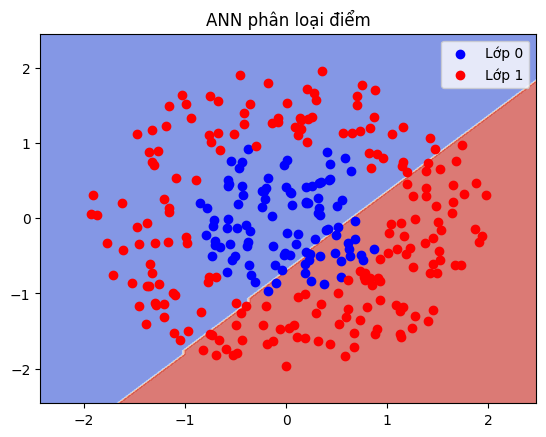

In [52]:
# Tạo lưới để vẽ ranh giới
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

# Dự đoán trên lưới
model.eval()
with torch.no_grad():
    pred_grid = model(grid)
    pred_grid = (pred_grid > 0.5).float().numpy().reshape(xx.shape)

# Vẽ
plt.contourf(xx, yy, pred_grid, alpha=0.7, cmap='coolwarm')  # Ranh giới
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Lớp 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Lớp 1')
plt.legend()
plt.title("ANN phân loại điểm")
plt.show()

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim

# Xây dựng mô hình ANN cơ bản 
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, 4)  # Đầu vào 2, ẩn 4
        self.relu = nn.ReLU()          # Công tắc ReLU
        self.layer2 = nn.Linear(4, 1)  # Ẩn 4, đầu ra 1
        self.sigmoid = nn.Sigmoid()    # Xác suất 0-1

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Khởi tạo mô hình
model = ANN()

# Định nghĩa mất mát và tối ưu hóa
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Giả lập dữ liệu huấn luyện
X_train = torch.rand((100, 2))  # 100 mẫu, 2 đặc trưng
y_train = torch.randint(0, 2, (100, 1), dtype=torch.float32)  # 100 nhãn nhị phân

# Huấn luyện lại mô hình với 100 epochs
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)    # Dự đoán
    loss = criterion(outputs, y_train)  # Tính sai lầm
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], loss: {loss.item():.4f}")

# Tính độ chính xác
model.eval()
with torch.no_grad():
    predictions = model(X_train)  # Đã có sigmoid trong mô hình
    predicted_labels = (predictions >= 0.5).float()
    accuracy = (predicted_labels.eq(y_train).sum().item()) / y_train.size(0)

print(f"Mất mát cuối: {loss.item():.4f}")
print(f"Độ chính xác: {accuracy * 100:.2f}%")

Epoch [20/100], loss: 0.6910
Epoch [40/100], loss: 0.6910
Epoch [60/100], loss: 0.6910
Epoch [80/100], loss: 0.6910
Epoch [100/100], loss: 0.6909
Mất mát cuối: 0.6909
Độ chính xác: 54.00%


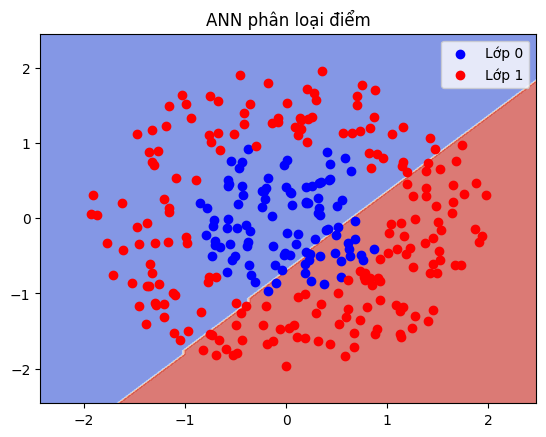

In [53]:
# Tạo lưới để vẽ ranh giới
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

# Dự đoán trên lưới
model.eval()
with torch.no_grad():
    pred_grid = model(grid)
    pred_grid = (pred_grid > 0.5).float().numpy().reshape(xx.shape)

# Vẽ
plt.contourf(xx, yy, pred_grid, alpha=0.7, cmap='coolwarm')  # Ranh giới
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Lớp 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Lớp 1')
plt.legend()
plt.title("ANN phân loại điểm")
plt.show()

# So sánh kết quả giữa BCEWithLogitsLoss và BCELoss
# Khác biệt về mất mát và độ chính xác

-   BCEWithLogitsLoss kết hợp sigmoid bên trong, giúp tính toán số ổn định hơn vì tránh các giá trị cực đoan trong quá trình huấn luyện.

-   BCELoss yêu cầu đầu vào đã được sigmoid hóa trước, có thể dẫn đến số không ổn định nếu giá trị đầu vào quá lớn hoặc quá nhỏ.

-   Thông thường, BCEWithLogitsLoss hoạt động tốt hơn một chút về mặt số học, giúp mô hình hội tụ ổn định hơn.

# So sánh kết quả

-   Nếu cả hai mô hình đều được huấn luyện đúng cách, sự khác biệt về độ chính xác thường không quá lớn.

-   Tuy nhiên, BCEWithLogitsLoss có thể giúp giảm mất mát nhanh hơn trong một số trường hợp vì nó xử lý đầu ra tốt hơn.
# So sánh giữa SGD và Adam
# Tốc độ giảm mất mát

-   Adam có tốc độ hội tụ nhanh hơn do nó tự động điều chỉnh tốc độ học (lr) theo từng tham số.

-   SGD có thể chậm hơn vì nó sử dụng một tốc độ học cố định và không có điều chỉnh thích ứng.

# Độ chính xác

-   Adam thường đạt độ chính xác cao hơn nhanh hơn trong giai đoạn đầu.

-   SGD có thể đạt độ chính xác tương tự nhưng cần nhiều epoch hơn.

-   Trong một số trường hợp, SGD giúp mô hình tổng quát hóa tốt hơn do không bị tối ưu hóa quá mức quá sớm.

# Kết luận
-   Nếu muốn hội tụ nhanh và giảm mất mát nhanh, Adam là lựa chọn tốt hơn.

-   Nếu muốn mô hình tổng quát hóa tốt hơn và tránh overfitting, SGD có thể là lựa chọn phù hợp hơn, nhưng cần điều chỉnh lr cẩn thận.

-   BCEWithLogitsLoss thường ổn định hơn BCELoss trong việc tính toán mất mát.

# Phần 3: Code vẽ đồ thị và câu trả lời cho "Phân tích kết quả".  

In [1]:
# Cài đặt thư viện
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
# Đặt seed để kết quả ổn định hơn (tùy chọn)
torch.manual_seed(42)
np.random.seed(42)

In [14]:
# Tạo điểm cho lớp 0 (vòng tròn)
def generate_class_0(n_samples):
    u = np.random.uniform(0, 1, n_samples)
    theta = np.random.uniform(0, 2 * np.pi, n_samples)
    r = np.sqrt(u)  # Bán kính nhỏ
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))

# Tạo điểm cho lớp 1 (vành đai)
def generate_class_1(n_samples):
    u = np.random.uniform(0, 1, n_samples)
    theta = np.random.uniform(0, 2 * np.pi, n_samples)
    r = np.sqrt(3 * u + 1)  # Bán kính lớn hơn
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))

# Tạo dữ liệu
X_class0 = generate_class_0(100)
X_class1 = generate_class_1(200)
y_class0 = np.zeros(100)  # Nhãn 0
y_class1 = np.ones(200)   # Nhãn 1

# Kết hợp dữ liệu
X = np.vstack((X_class0, X_class1))
y = np.hstack((y_class0, y_class1))

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuyển sang tensor PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).unsqueeze(1)  # Thêm chiều cho nhãn
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).unsqueeze(1)

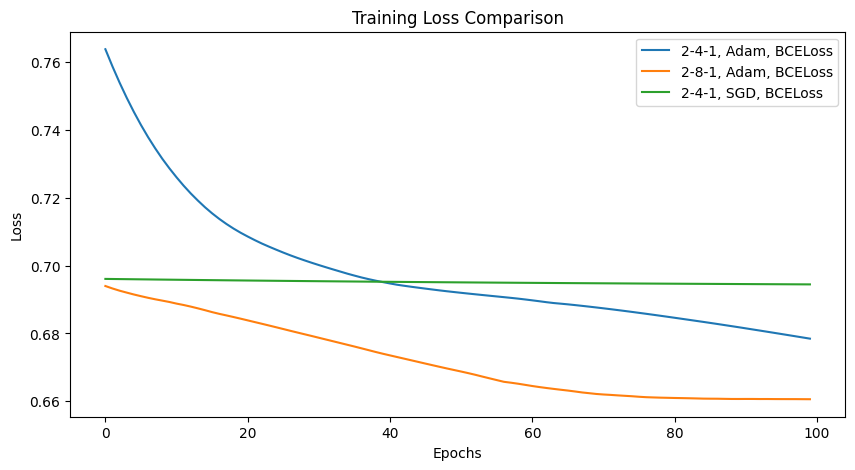

In [15]:

# Xây dựng mô hình ANN
class ANN(nn.Module):
    def __init__(self, hidden_size=4):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, hidden_size)  # Đầu vào 2, ẩn hidden_size
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, 1)  # Ẩn hidden_size, đầu ra 1
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Hàm huấn luyện
def train_model(hidden_size, optimizer_type, epochs=100):
    model = ANN(hidden_size)
    criterion = nn.BCELoss()
    optimizer = optimizer_type(model.parameters(), lr=0.01)
    loss_history = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())
    
    return loss_history

# Giả lập dữ liệu huấn luyện
X_train = torch.rand((100, 2))  # 100 mẫu, 2 đặc trưng
y_train = torch.randint(0, 2, (100, 1), dtype=torch.float32)  # 100 nhãn nhị phân

# Huấn luyện với 3 trường hợp
loss_2_4_1_adam = train_model(4, optim.Adam)
loss_2_8_1_adam = train_model(8, optim.Adam)
loss_2_4_1_sgd = train_model(4, optim.SGD)

# Vẽ đồ thị mất mát
plt.figure(figsize=(10, 5))
plt.plot(loss_2_4_1_adam, label='2-4-1, Adam, BCELoss')
plt.plot(loss_2_8_1_adam, label='2-8-1, Adam, BCELoss')
plt.plot(loss_2_4_1_sgd, label='2-4-1, SGD, BCELoss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.show()


# Mất mát giảm nhanh nhất

-   Trường hợp 2-8-1, Adam, BCELoss (đường màu cam) giảm nhanh nhất.

-   Điều này có thể do số lượng neuron ẩn tăng lên (từ 4 lên 8), giúp mô hình có khả năng biểu diễn tốt hơn.

-   Bộ tối ưu Adam cũng giúp cập nhật trọng số hiệu quả hơn.

# Mất mát giảm chậm nhất

-   Trường hợp 2-4-1, SGD, BCELoss (đường màu xanh lá) gần như không giảm đáng kể.

-   SGD có tốc độ hội tụ chậm hơn Adam, và có thể bị kẹt trong các vùng gradient nhỏ.

# Có trường hợp nào mất mát dao động không?

-   Không có đường nào thể hiện sự dao động lớn, nhưng đường 2-4-1, Adam, BCELoss (xanh dương) có xu hướng giảm không đều.

-   Điều này có thể do Adam sử dụng moment và điều chỉnh tốc độ học, đôi khi có dao động nhỏ khi tìm điểm tối ưu.

# Kết luận:

-   Tăng số neuron (2-8-1) giúp mô hình học nhanh hơn.

-   Adam giúp hội tụ nhanh hơn SGD.

-   SGD có thể cần số epoch nhiều hơn để giảm mất mát hiệu quả.